/tmp/ipykernel_93787/1967601353.py:33: RuntimeWarning: invalid value encountered in double_scalars
  result[i, j] = (img[i-1, j-1] * img[i-1, j] * img[i-1, j+1] *


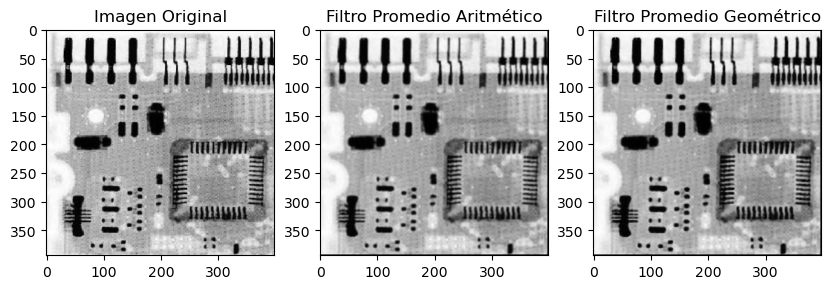

In [1]:
#Ejercicio 1
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Cargar la imagen del circuito
image_path = './ImagenesFiguras/circuitobn.png'  # Cambia la ruta a la ubicación de tu imagen
img = io.imread(image_path)

# Agregar ruido gaussiano aditivo con media cero y desviación estándar de 0.04
ruido_gauss = np.random.normal(0, 0.04, img.shape)
img_ruido = img + ruido_gauss

# Filtrar la imagen con un filtro promedio aritmético de tamaño 3x3
def filtro_promedio(img):
    h, w = img.shape
    result = np.zeros_like(img, dtype=float)
    for i in range(1, h-1):
        for j in range(1, w-1):
            result[i, j] = (img[i-1, j-1] + img[i-1, j] + img[i-1, j+1] +
                            img[i, j-1] + img[i, j] + img[i, j+1] +
                            img[i+1, j-1] + img[i+1, j] + img[i+1, j+1]) / 9
    return result.astype(np.uint8)

filtro_aritmetico = filtro_promedio(img_ruido)

# Filtrar la imagen con un filtro promedio geométrico de tamaño 3x3
def filtro_geom(img):
    h, w = img.shape
    result = np.zeros_like(img, dtype=float)
    for i in range(1, h-1):
        for j in range(1, w-1):
            result[i, j] = (img[i-1, j-1] * img[i-1, j] * img[i-1, j+1] *
                            img[i, j-1] * img[i, j] * img[i, j+1] *
                            img[i+1, j-1] * img[i+1, j] * img[i+1, j+1])**(1/9)
    return result.astype(np.uint8)

filtrado_geom = filtro_geom(img_ruido)

# Comparar las imágenes
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(filtro_aritmetico, cmap='gray') 
plt.title('Filtro Promedio Aritmético')

plt.subplot(1, 3, 3)
plt.imshow(filtrado_geom, cmap='gray')  
plt.title('Filtro Promedio Geométrico')

plt.show()

/tmp/ipykernel_93787/2537762426.py:43: RuntimeWarning: invalid value encountered in power
  result[i, j] = np.power(np.prod(img[i-3:i+4, j-3:j+4]), 1/49)


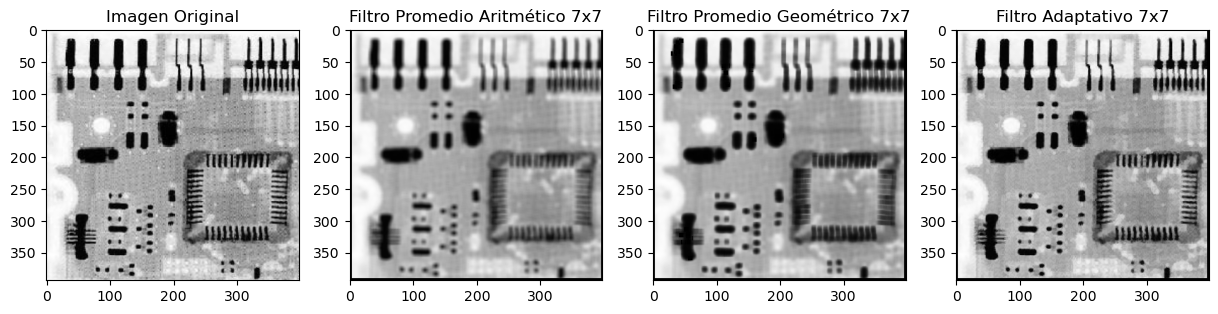

In [2]:
#Ejercicio 2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Cargar la imagen del circuito
image_path = './ImagenesFiguras/circuitobn.png'  # Cambia la ruta a la ubicación de tu imagen
img = io.imread(image_path)

# Agregar ruido gaussiano aditivo con media cero y desviación estándar de 0.04
ruido_gauss = np.random.normal(0, 0.04, img.shape)
img_ruido = img + ruido_gauss

# Función para aplicar un filtro de mediana adaptativo de tamaño 7x7
def filtro_adaptativo(img):
    h, w = img.shape
    result = np.zeros_like(img, dtype=np.uint8)
    for i in range(3, h-3):
        for j in range(3, w-3):
            vecindad = img[i-3:i+4, j-3:j+4].ravel()
            mediana_local = np.median(vecindad)
            desviacion_local = np.median(np.abs(vecindad - mediana_local))
            result[i, j] = np.clip(img[i, j], mediana_local - desviacion_local, mediana_local + desviacion_local)
    return result

# Filtrar la imagen con un filtro promedio aritmético de tamaño 7x7
def filtro_promedio(img):
    h, w = img.shape
    result = np.zeros_like(img, dtype=float)
    for i in range(3, h-3):
        for j in range(3, w-3):
            result[i, j] = np.mean(img[i-3:i+4, j-3:j+4])
    return result.astype(np.uint8)

filtro_aritmetico_7x7 = filtro_promedio(img_ruido)

# Filtrar la imagen con un filtro promedio geométrico de tamaño 7x7
def filtro_geom(img):
    h, w = img.shape
    result = np.zeros_like(img, dtype=float)
    for i in range(3, h-3):
        for j in range(3, w-3):
            result[i, j] = np.power(np.prod(img[i-3:i+4, j-3:j+4]), 1/49)
    return result.astype(np.uint8)

filtrado_geom_7x7 = filtro_geom(img_ruido)

# Filtrar la imagen con un filtro adaptativo (mediana adaptativa) de tamaño 7x7
filtrado_adaptativo_7x7 = filtro_adaptativo(img_ruido)

# Comparar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 4, 2)
plt.imshow(filtro_aritmetico_7x7, cmap='gray')
plt.title('Filtro Promedio Aritmético 7x7')

plt.subplot(1, 4, 3)
plt.imshow(filtrado_geom_7x7, cmap='gray')
plt.title('Filtro Promedio Geométrico 7x7')

plt.subplot(1, 4, 4)
plt.imshow(filtrado_adaptativo_7x7, cmap='gray')
plt.title('Filtro Adaptativo 7x7')

plt.show()


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


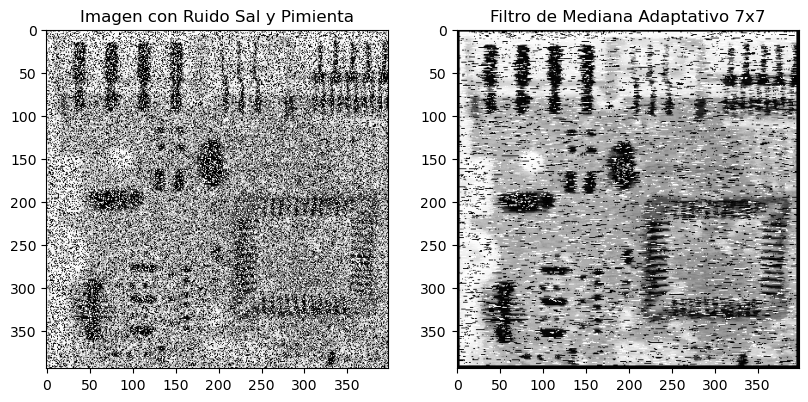

In [3]:
#Ejercicio 3
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Cargar la imagen del circuito
image_path = './ImagenesFiguras/circuitobn.png'  # Cambia la ruta a la ubicación de tu imagen
img = io.imread(image_path)

# Agregar ruido de sal y pimienta con probabilidades Pa = Pb = 0.25
def ruido_sal_pimienta(img, pa, pb):
    ruido = np.random.rand(*img.shape)
    img_ruido = np.copy(img)
    img_ruido[ruido < pa] = 0  # Sal
    img_ruido[ruido > (1 - pb)] = 255  # Pimienta
    return img_ruido

img_sal_pimienta = ruido_sal_pimienta(img, 0.25, 0.25)

# Función para aplicar un filtro de mediana adaptativo de tamaño 7x7
def filtro_mediana_adaptativo(img, s_max=7):
    h, w = img.shape
    result = np.zeros_like(img, dtype=np.uint8)

    for i in range(3, h-3):
        for j in range(3, w-3):
            vecindad = img[i-3:i+4, j-3:j+4].ravel()
            s_local = min(s_max, np.median(np.abs(vecindad - np.median(vecindad))))
            result[i, j] = np.median(vecindad[:int(s_local)])

    return result

# Filtrar la imagen con un filtro de mediana adaptativo de tamaño 7x7
filtro_mediana_adaptativo_7x7 = filtro_mediana_adaptativo(img_sal_pimienta)

# Comparar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_sal_pimienta, cmap='gray')
plt.title('Imagen con Ruido Sal y Pimienta')

plt.subplot(1, 3, 2)
plt.imshow(filtro_mediana_adaptativo_7x7, cmap='gray')
plt.title('Filtro de Mediana Adaptativo 7x7')

plt.show()


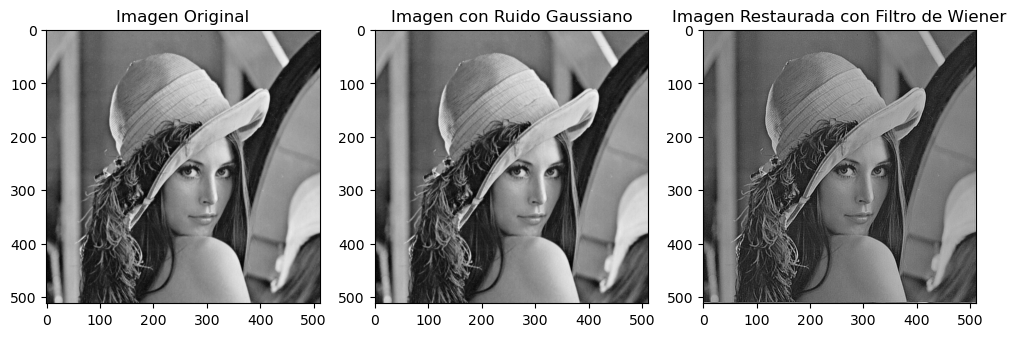

In [4]:
#Ejercicio 4
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy.fft import fft2, ifft2, fftshift, ifftshift

def wiener_filter(img, kernel, snr):
    # Calcula la transformada de Fourier de la imagen y el kernel
    F = fft2(img)
    H = fft2(kernel, s=img.shape)
    
    # Aplica el filtro de Wiener
    G = H.conjugate() / (np.abs(H)**2 + 1/snr) * F
    
    # Calcula la imagen restaurada mediante la transformada inversa de Fourier
    restored_img = np.abs(ifft2(G))
    
    return restored_img

def gaussian_kernel(size, sigma):
    """Genera un kernel gaussiano."""
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# Cargar la imagen Lena en escala de grises
image_path = './ImagenesFiguras/lenagbn.png'
img = io.imread(image_path, as_gray=True)

# Agregar ruido gaussiano aditivo
snr = 25  # Relación señal-ruido
noise = np.random.normal(0, 1/snr, img.shape)
img_noisy = img + noise

# Definir un kernel gaussiano para simular el desenfoque
kernel_size = 5
sigma = 1.0
gaussian_kernel = gaussian_kernel(kernel_size, sigma)

# Aplicar el filtro de Wiener
restored_img = wiener_filter(img_noisy, gaussian_kernel, snr)

# Visualizar las imágenes
plt.figure(figsize=(12, 4))

# Imagen Original
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

# Imagen con Ruido Gaussiano
plt.subplot(1, 3, 2)
plt.imshow(img_noisy, cmap='gray')
plt.title('Imagen con Ruido Gaussiano')

# Imagen Restaurada con Filtro de Wiener
plt.subplot(1, 3, 3)
plt.imshow(restored_img, cmap='gray')
plt.title('Imagen Restaurada con Filtro de Wiener')

plt.show()



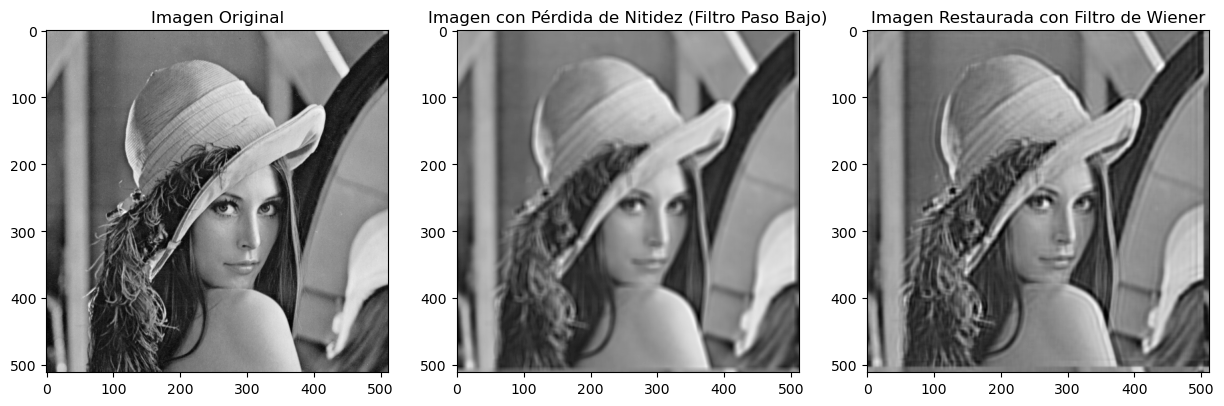

In [5]:
#Ejercicio 5
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy.fft import fft2, ifft2, fftshift, ifftshift

def wiener_filter(img, kernel, snr):
    # Calcula la transformada de Fourier de la imagen y el kernel
    F = fft2(img)
    H = fft2(kernel, s=img.shape)
    
    # Aplica el filtro de Wiener
    G = H.conjugate() / (np.abs(H)**2 + 1/snr) * F

    
    # Calcula la imagen restaurada mediante la transformada inversa de Fourier
    restored_img = np.abs(ifft2(G))
    
    return restored_img

def weighted_average_filter(size):
    """Genera un filtro promedio ponderado (filtro paso bajo)."""
    kernel = np.ones((size, size))
    return kernel / np.sum(kernel)

# Cargar la imagen Lena en escala de grises
image_path = './ImagenesFiguras/lenagbn.png'
img_original = io.imread(image_path, as_gray=True)

# Simular la pérdida de nitidez con un filtro paso bajo de tamaño 9x9
kernel_size = 9
blur_kernel = weighted_average_filter(kernel_size)
img_blurred = wiener_filter(img_original, blur_kernel, 1)

# Aplicar el filtro de Wiener para restaurar la imagen
snr = 25  # Relación señal-ruido
restored_img = wiener_filter(img_blurred, blur_kernel, snr)

# Visualizar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(img_blurred, cmap='gray')
plt.title('Imagen con Pérdida de Nitidez (Filtro Paso Bajo)')

plt.subplot(1, 3, 3)
plt.imshow(restored_img, cmap='gray')
plt.title('Imagen Restaurada con Filtro de Wiener')

plt.show()


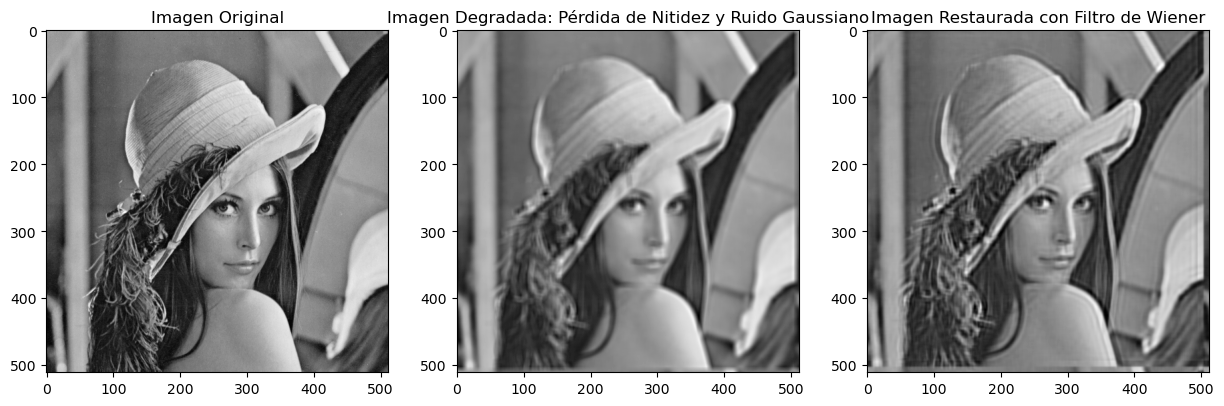

In [6]:
#Ejercicio 6
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy.fft import fft2, ifft2

def wiener_filter(img, kernel, snr):
    # Calcula la transformada de Fourier de la imagen y el kernel
    F = fft2(img)
    H = fft2(kernel, s=img.shape)
    
    # Aplica el filtro de Wiener
    G = H.conjugate() / (np.abs(H)**2 + 1/snr) * F
    
    # Calcula la imagen restaurada mediante la transformada inversa de Fourier
    restored_img = np.abs(ifft2(G))
    
    return restored_img

def weighted_average_filter(size):
    """Genera un filtro promedio ponderado (filtro paso bajo)."""
    kernel = np.ones((size, size))
    return kernel / np.sum(kernel)

# Cargar la imagen Lena en escala de grises
image_path = './ImagenesFiguras/lenagbn.png'
img_original = io.imread(image_path, as_gray=True)

# Simular pérdida de nitidez con un filtro paso bajo de tamaño 9x9
kernel_size = 9
blur_kernel = weighted_average_filter(kernel_size)
img_blurred = wiener_filter(img_original, blur_kernel, 1)

# Agregar ruido gaussiano aditivo
snr_noise = 25  # Relación señal-ruido para el ruido gaussiano
noise = np.random.normal(0, 1/snr_noise, img_original.shape)
img_noisy = img_blurred + noise

# Aplicar el filtro de Wiener para restaurar la imagen
snr_wiener = 25  # Relación señal-ruido para el filtro de Wiener
restored_img = wiener_filter(img_noisy, blur_kernel, snr_wiener)

# Visualizar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(img_noisy, cmap='gray')
plt.title('Imagen Degradada: Pérdida de Nitidez y Ruido Gaussiano')

plt.subplot(1, 3, 3)
plt.imshow(restored_img, cmap='gray')
plt.title('Imagen Restaurada con Filtro de Wiener')

plt.show()


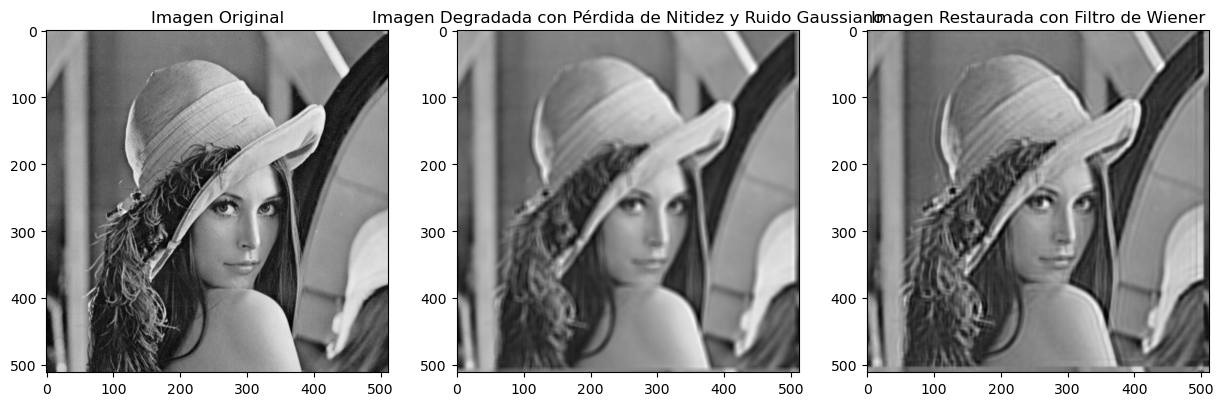

In [7]:
#Ejercicio 7
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from numpy.fft import fft2, ifft2, fftshift, ifftshift

def wiener_filter(img, kernel, snr):
    # Calcula la transformada de Fourier de la imagen y el kernel
    F = fft2(img)
    H = fft2(kernel, s=img.shape)
    
    # Aplica el filtro de Wiener
    G = H.conjugate() / (np.abs(H)**2 + 1/snr) * F
    
    # Calcula la imagen restaurada mediante la transformada inversa de Fourier
    restored_img = np.abs(ifft2(G))
    
    return restored_img

def weighted_average_filter(size):
    """Genera un filtro promedio ponderado (filtro paso bajo)."""
    kernel = np.ones((size, size))
    return kernel / np.sum(kernel)

# Cargar la imagen Lena en escala de grises
image_path = './ImagenesFiguras/lenagbn.png'
img_original = io.imread(image_path, as_gray=True)

# Simular pérdida de nitidez con un filtro paso bajo de tamaño 9x9
kernel_size = 9
blur_kernel = weighted_average_filter(kernel_size)
img_blurred = wiener_filter(img_original, blur_kernel, 1)

# Agregar ruido gaussiano aditivo
snr_noise = 25  # Relación señal-ruido para el ruido gaussiano
noise = np.random.normal(0, 1/snr_noise, img_original.shape)
img_noisy = img_blurred + noise

# Aplicar el filtro de Wiener para restaurar la imagen
snr_wiener = 25  # Relación señal-ruido para el filtro de Wiener
restored_img = wiener_filter(img_noisy, blur_kernel, snr_wiener)

# Visualizar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(img_noisy, cmap='gray')
plt.title('Imagen Degradada con Pérdida de Nitidez y Ruido Gaussiano')

plt.subplot(1, 3, 3)
plt.imshow(restored_img, cmap='gray')
plt.title('Imagen Restaurada con Filtro de Wiener')

plt.show()
